In [129]:
from IPython.display import Markdown as md

_nb_loc = "dataquest.ipynb"
_nb_title = "Objective Data Quest"

_nb_safeloc = _nb_loc.replace('/', '%2F')
md("""
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/AllOneeeee/DataQuest24">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>
""".format(_nb_loc, _nb_title, _nb_safeloc))


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/AllOneeeee/DataQuest24">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>


In [130]:
print("Hello World")

Hello World


In [131]:
import tensorflow as tf

print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

2.13.0
GPU device not found


In [132]:
import pandas as pd

data = pd.read_csv("data/train.csv").sample(200)
data.head()

In [ ]:
def calculate_missing_values(data):
    miss = data.isna().sum()
    miss_proportion = (miss / len(data)) * 100
    output_train = pd.DataFrame({
        'Missing Values': miss,
        'Proportion (%)': miss_proportion
    })    
    return output_train

def highlight_missing_values(val):
    if val > 30:
        color = 'background-color: red'
    elif val > 20:
        color = 'background-color: orange'
    elif val > 10:
        color = 'background-color: yellow'
    else:
        color = ''
    return color

print("Number of observations: {}".format(len(data)))
miss_data = calculate_missing_values(data)
styled_miss_data = miss_data.style.applymap(highlight_missing_values, subset=['Proportion (%)'])

styled_miss_data

Number of observations: 416473


,Missing Values,Proportion (%)
flow_duration,117064,28.108425
forward_packets_per_sec,123392,29.627851
backward_packets_per_sec,92239,22.147654
flow_packets_per_sec,111750,26.832472
down_up_ratio,123615,29.681396
flow_FIN_flags,112049,26.904265
flow_SYN_flags,91010,21.852557
flow_RST_flags,105436,25.316407
forward_PSH_flags,116525,27.979005
backward_PSH_flags,63554,15.260053


<Axes: >

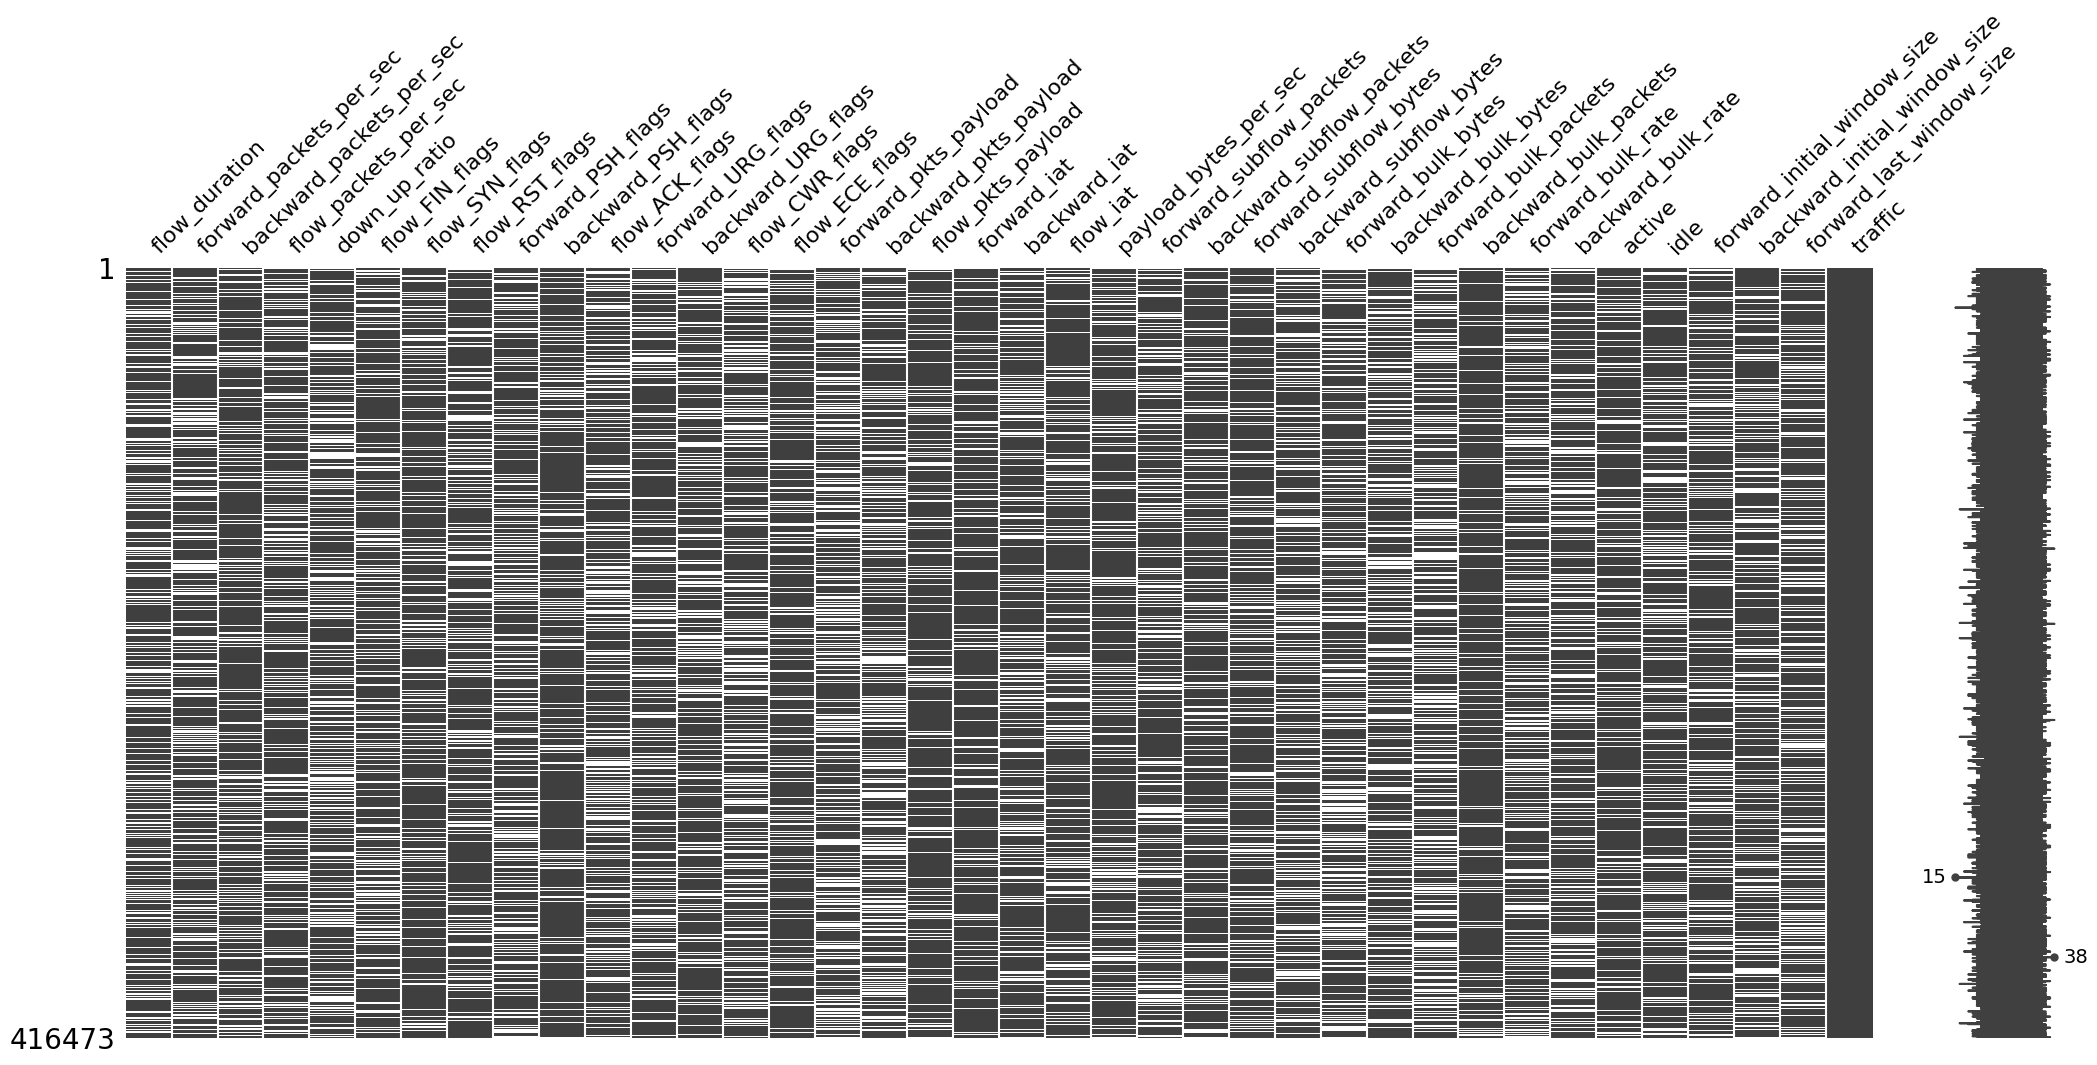

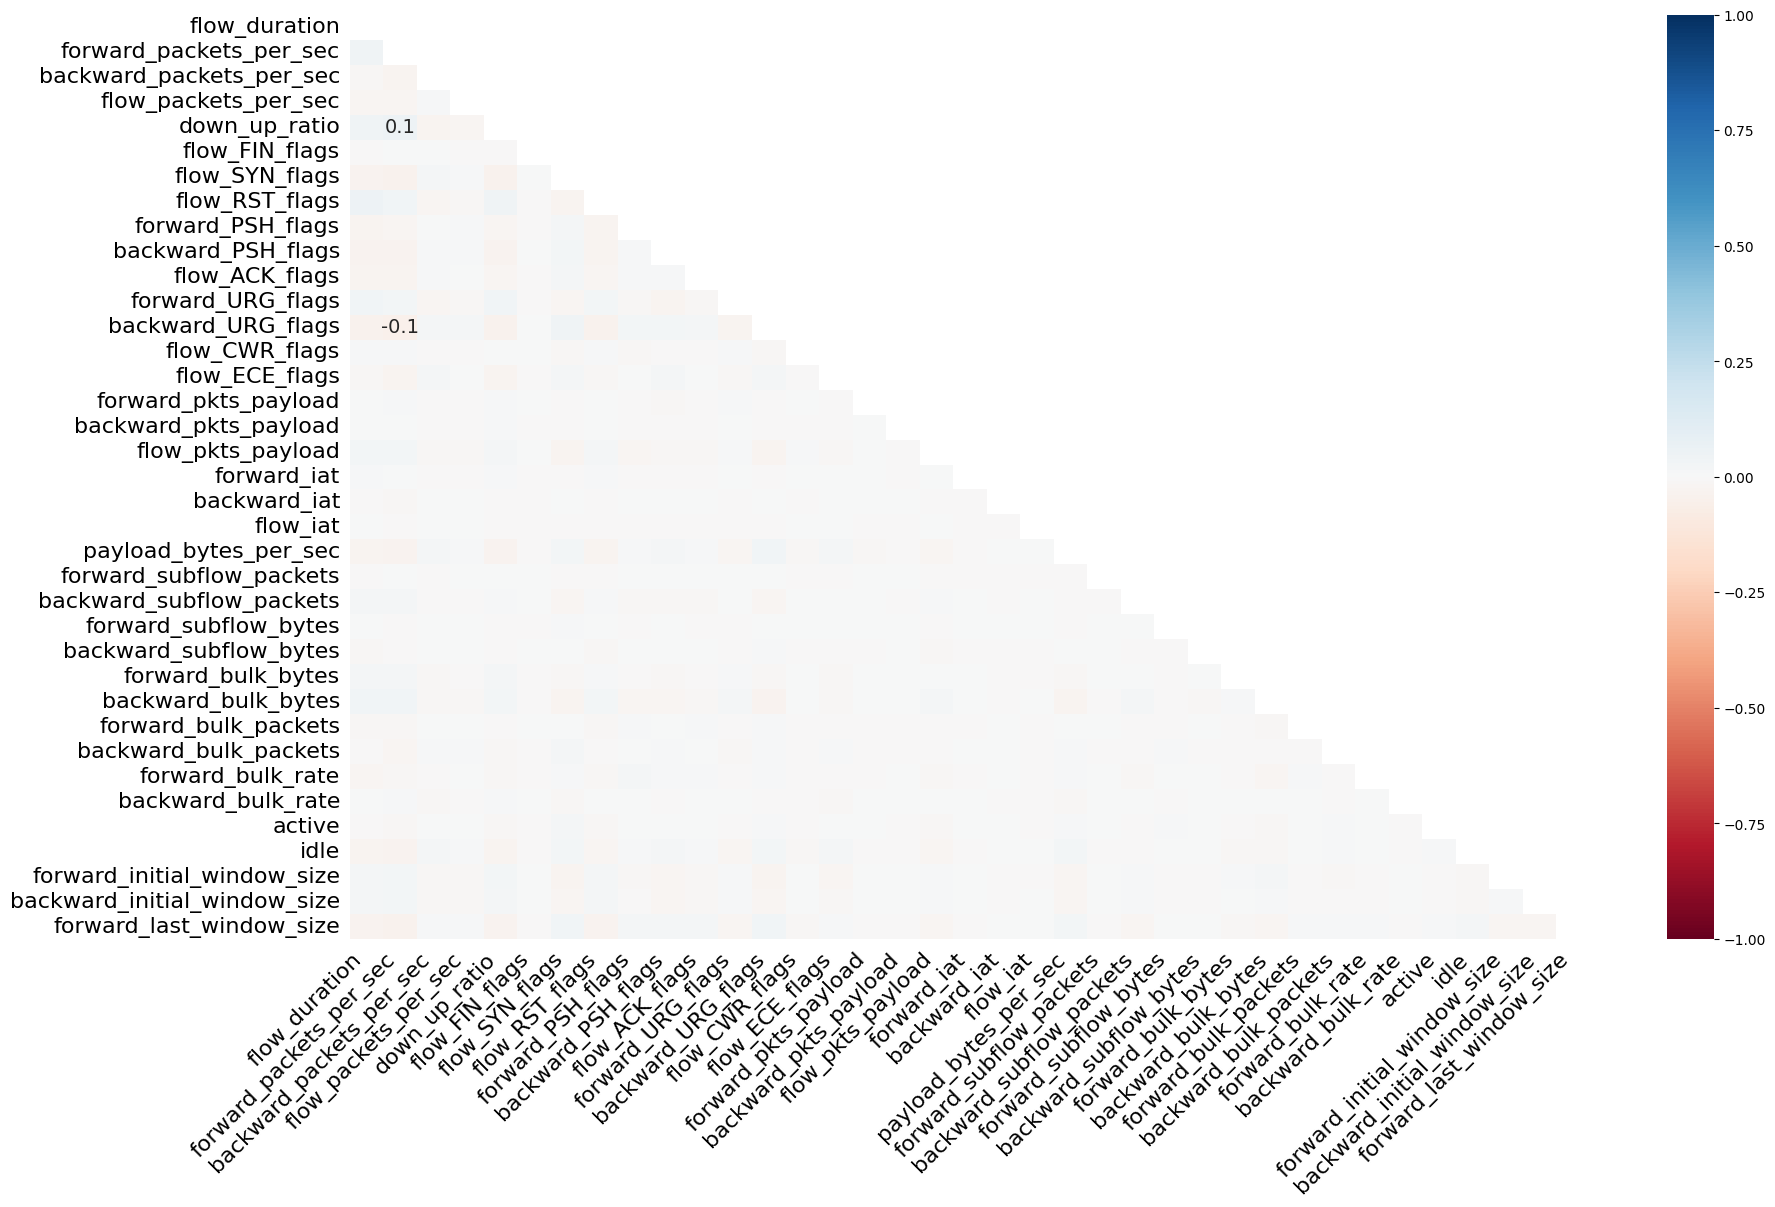

In [ ]:
import missingno as msno

msno.matrix(data)
msno.heatmap(data)

In [ ]:
features_to_drop = miss_data[miss_data["Proportion (%)"] > 30].index
data_cleaned = data.drop(columns=features_to_drop)
print("Dropped features:", features_to_drop)

Dropped features: Index(['flow_ACK_flags', 'flow_CWR_flags', 'forward_pkts_payload',
       'backward_pkts_payload', 'forward_bulk_bytes', 'backward_bulk_bytes',
       'forward_bulk_packets', 'forward_bulk_rate'],
      dtype='object')


In [ ]:
from sklearn.impute import KNNImputer

remove_col = ['id', 'origin_host', 'origin_port', 'response_host', 'response_port']
data = data.drop(columns=remove_col)

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=5)

traffic_col = data[['traffic']].copy()
data_to_impute = data.drop(columns=['traffic'])
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(knn_imputer.fit_transform(data_to_impute), columns=data_to_impute.columns)
data_imputed['traffic'] = traffic_col.values
data_imputed = data_imputed.reset_index(drop=True)
print(data_imputed.head())

KeyboardInterrupt: 

In [ ]:
data = data.fillna(data.mean(numeric_only=True))
data.to_csv("data/processing/data_fill.csv", index=False)

In [ ]:
CLASSES = 'Background', 'Benign', 'Probing', 'Bruteforce', 'XMRIGCC CryptoMiner', 'Bruteforce-XML'.split()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_category_counts(data, column_name):
    
    counts = data[column_name].value_counts()
    
    sorted_counts = counts.sort_values(ascending=False)
    sorted_proportions = sorted_counts / sorted_counts.sum()
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette='viridis')
    
    for bar in ax.patches:
        height = bar.get_height()
        category_name = bar.get_x() + bar.get_width() / 2
        proportion = sorted_proportions[sorted_counts.index[int(category_name)]]
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02 * height, 
                f'{proportion:.2%}', 
                ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Count of Each Category in {column_name}', fontsize=15)
    plt.xticks(rotation=45)  
    plt.show()

plot_category_counts(data, 'traffic')

In [ ]:
data.duplicated().sum()

In [ ]:
def mean_by_traffic(data, output_file):

    mean_by_traffic_numerical = data.groupby('traffic')[numerical_columns].mean().round(2)

    mean_by_traffic_numerical.to_csv(output_file, index=True)

    print(mean_by_traffic_numerical)
    print(f"Mean values by traffic category have been saved to '{output_file}'.")

mean_by_traffic(data, 'data/processing/mean_by_traffic_numerical.csv')

In [ ]:
def plot_boxplots(data):
    num_cols=2
    num_plots = len(numerical_columns)
    num_rows = (num_plots + num_cols - 1) // num_cols 

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 7.5, num_rows * 5))
    axes = axes.flatten()  

    for i, column in enumerate(numerical_columns):
        sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')

    for j in range(len(numerical_columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplots(data)

For big data problems, outliers are generally not a problem in fitting the regression to
be used in predicting new data. However, outliers are central to anomaly detection,
where finding outliers is the whole point. The outlier could also correspond to a case
of fraud or an accidental action. In any case, detecting outliers can be a critical busi‐
ness need.

In [ ]:
from sklearn.model_selection import train_test_split
remove_col = ['id', 'origin_host', 'origin_port', 'response_host', 'response_port', 'traffic']

X = data.drop(columns=remove_col, axis=1)  # Features 
y = data['traffic']                        # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of train data: {} \nNumber of test data: {}".format(len(X_train), len(y_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classifier_names = ["LR", 'kNN', 'Random Forest', 'Boosted Trees']
classifiers = [LogisticRegression(random_state=42),
              KNeighborsClassifier(5),
              RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,
                                     random_state=42),
              GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=5, random_state=42)]

for name, model in zip(classifier_names, classifiers):
    model.fit(X_train, y_train)
    print(f"{name} classifier has been trained.")


In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, balanced_accuracy_score

results = {'Classifier': [], 'F1-Score': [], 'Balanced Accuracy': []}

for name, model in zip(classifier_names, classifiers):
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    
    results['Classifier'].append(name)
    results['F1-Score'].append(f1)
    results['Balanced Accuracy'].append(balanced_acc)

df_results = pd.DataFrame(results)

styled_df = df_results.style.apply(lambda x: ['background-color: green' if v == max(x) else '' for v in x], subset=['F1-Score', 'Balanced Accuracy'])
styled_df


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classifier_names = ["LR", 'kNN', 'Random Forest', 'Boosted Trees']
classifiers = [LogisticRegression(random_state=42),
              KNeighborsClassifier(5),
              RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,
                                     random_state=42),
              GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=5, random_state=42)]

for name, model in zip(classifier_names, classifiers):
    model.fit(X_train, y_train)
    print(f"{name} classifier has been trained.")


In [ ]:
import numpy as np
import seaborn as sns

def display_confusion_matrix(cmat, score, f1, best_model):
    plt.figure(figsize=(12, 10))  
    ax = plt.gca()
    
    sns.heatmap(cmat, annot=True, fmt='.2f', cmap='Reds', ax=ax, 
                xticklabels=CLASSES, yticklabels=CLASSES,
                cbar=True, cbar_kws={'shrink': 0.8}, annot_kws={"size": 10})
    
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_title('Confusion Matrix for {}'.format(best_model), fontsize=15)
    
    titlestring = ""
    if score is not None:
        titlestring += 'Balanced Accuracy = {:.3f} '.format(score)
    if f1 is not None:
        titlestring += '\nF1-Score = {:.3f} '.format(f1)
    if len(titlestring) > 0:
        plt.figtext(0.8, 1, titlestring, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontsize=12, color='#804040', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
    
    plt.tight_layout()  
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

best_model = None
best_f1 = 0
best_score = 0
best_cmat = None

for name, model in zip(classifier_names, classifiers):
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    cmat = confusion_matrix(y_test, y_pred)
    cmat = cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis]
    
    if f1 > best_f1:  
        best_model = name
        best_f1 = f1
        best_score = balanced_acc
        best_cmat = cmat

display_confusion_matrix(best_cmat, best_score, best_f1, best_model)